<a href="https://colab.research.google.com/github/AdarshChandra42/Car-Price-Prediction-linear-regression/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf #for models
import pandas as pd #for reading and processing data
import seaborn as sns #for visualization
import numpy as np
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

**Data Preparation**

In [ ]:
data = pd.read_csv("train.csv", ",")
data.head()

<ipython-input-4-5b1cd68051af>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("train.csv", ",")


,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [ ]:
tensor_data = tf.constant(data)
#tensor_data = tf.cast(tensor_data, tf.float32)
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[4.940000e+02 6.214070e+05 8.910490e+05 5.000000e+00 1.217390e+05
  3.000000e+00 3.000000e+00 1.100000e+01 1.660000e+02 7.700000e+01
  1.320000e+02 2.682005e+05]
 [1.800000e+01 5.835600e+05 8.824260e+05 4.000000e+00 1.155760e+05
  2.000000e+00 6.000000e+00 1.400000e+01 1.950000e+02 6.900000e+01
  9.300000e+01 2.743575e+05]
 [4.750000e+02 5.980990e+05 7.652900e+05 7.000000e+00 6.752000e+04
  2.000000e+00 9.000000e+00 9.000000e+00 1.410000e+02 1.030000e+02
  7.500000e+01 4.329515e+05]
 [9.870000e+02 6.040120e+05 7.810100e+05 7.000000e+00 1.260750e+05
  2.000000e+00 9.000000e+00 1.400000e+01 1.470000e+02 1.020000e+02
  1.370000e+02 2.096390e+05]
 [8.580000e+02 5.777910e+05 7.555980e+05 6.000000e+00 1.373470e+05
  3.000000e+00 3.000000e+00 1.400000e+01 1.640000e+02 7.000000e+01
  1.310000e+02 1.139420e+05]], shape=(5, 12), dtype=float64)


In [ ]:
X= tensor_data[:,3:-1]
print(X[:5])

tf.Tensor(
[[5.00000e+00 1.21739e+05 3.00000e+00 3.00000e+00 1.10000e+01 1.66000e+02
  7.70000e+01 1.32000e+02]
 [4.00000e+00 1.15576e+05 2.00000e+00 6.00000e+00 1.40000e+01 1.95000e+02
  6.90000e+01 9.30000e+01]
 [7.00000e+00 6.75200e+04 2.00000e+00 9.00000e+00 9.00000e+00 1.41000e+02
  1.03000e+02 7.50000e+01]
 [7.00000e+00 1.26075e+05 2.00000e+00 9.00000e+00 1.40000e+01 1.47000e+02
  1.02000e+02 1.37000e+02]
 [6.00000e+00 1.37347e+05 3.00000e+00 3.00000e+00 1.40000e+01 1.64000e+02
  7.00000e+01 1.31000e+02]], shape=(5, 8), dtype=float64)


In [ ]:
Y = tensor_data[:,-1]
Y = tf.expand_dims(Y,axis=-1)
print(Y[:5])

tf.Tensor(
[[268200.5]
 [274357.5]
 [432951.5]
 [209639. ]
 [113942. ]], shape=(5, 1), dtype=float64)


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [ ]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
Y_train = Y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(Y_train.shape)

(800, 8)
(800, 1)


In [ ]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
Y_val = Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(Y_val.shape)

(100, 8)
(100, 1)


In [ ]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
Y_test = Y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(Y_test.shape)

(100, 8)
(100, 1)


In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.25863108,  0.72911334,  0.02392429, -0.9329368 , -0.25952944,
        -0.04625112, -0.3603697 ,  1.3631754 ],
       [-0.3209344 ,  0.52068233, -0.6849372 ,  0.13327727,  1.0799835 ,
         1.4650323 , -0.7554984 , -0.49610594],
       [ 1.417762  , -1.104559  , -0.6849372 ,  1.1994913 , -1.1525381 ,
        -1.3490818 ,  0.9237986 , -1.3542358 ],
       [ 1.417762  ,  0.8757557 , -0.6849372 ,  1.1994913 ,  1.0799835 ,
        -1.0364023 ,  0.87440753,  1.6015447 ],
       [ 0.8381965 ,  1.2569718 ,  0.02392429, -0.9329368 ,  1.0799835 ,
        -0.15047757, -0.7061073 ,  1.3155015 ]], dtype=float32)>

Model preparation

In [ ]:
model = tf.keras.Sequential([

                             InputLayer(input_shape=(8,)),
                             normalizer,
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(128, activation = "relu"),
                             Dense(1)

])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34322 (134.07 KB)
Trainable params: 34305 (134.00 KB)
Non-trainable params: 17 (72.00 Byte)
________________

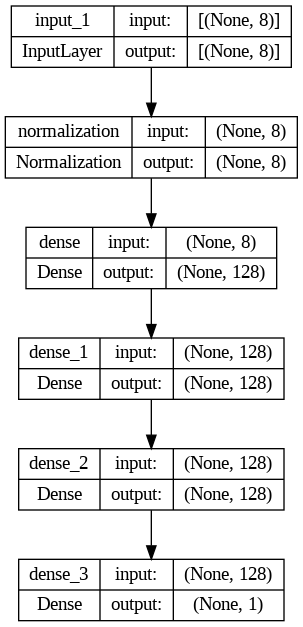

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer = Adam(learning_rate=0.1),
    loss=MeanAbsoluteError(),
    metrics = RootMeanSquaredError())

Training the model (i guess)


In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100,verbose=1)
#epoch -> no. of times we're gunna update our weights, verbose -> if you set it to 0 you don't see the loss values while training

Epoch 1/100
25/25 [==============================] - 1s 8ms/step - loss: 151711.1875 - root_mean_squared_error: 199658.7812 - val_loss: 56169.2344 - val_root_mean_squared_error: 67195.5469
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 52727.7383 - root_mean_squared_error: 64781.5352 - val_loss: 55379.6953 - val_root_mean_squared_error: 68378.2578
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 47965.9609 - root_mean_squared_error: 59549.5938 - val_loss: 56895.6211 - val_root_mean_squared_error: 67503.7734
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 44732.4805 - root_mean_squared_error: 55614.7188 - val_loss: 47111.8867 - val_root_mean_squared_error: 57766.7773
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 39182.4492 - root_mean_squared_error: 47629.3516 - val_loss: 48893.1562 - val_root_mean_squared_error: 60053.2812
Epoch 6/100
25/25 [==============================] - 0s 3ms/ste

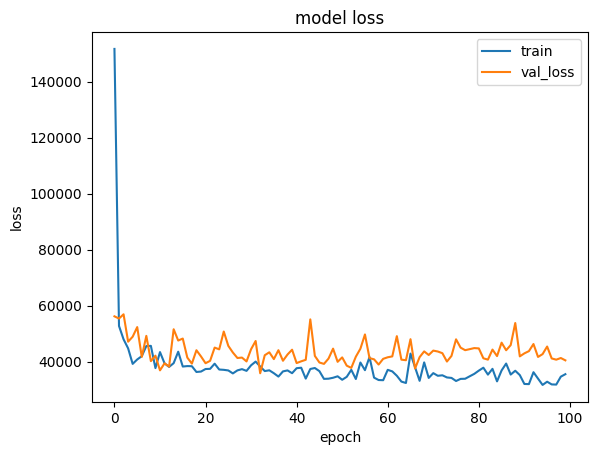

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

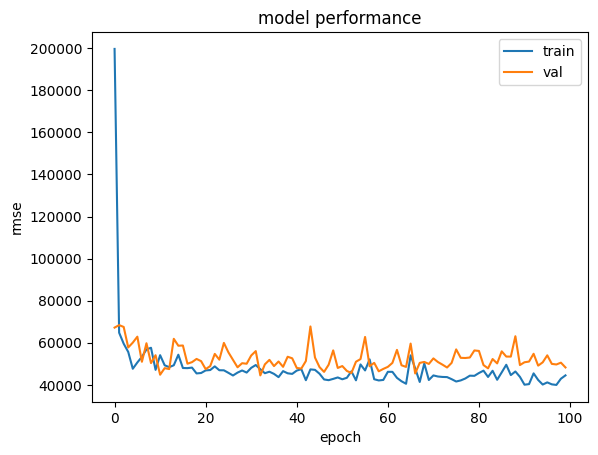

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 40432.0312 - root_mean_squared_error: 50811.4570


[40432.03125, 50811.45703125]

In [ ]:
model.predict(tf.expand_dims(X_test[0],axis=0))

1/1 [==============================] - 0s 70ms/step


array([[228053.2]], dtype=float32)

In [ ]:
Y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([246242.])>

In [ ]:
Y_pred=list(model.predict(X_test)[:,0]) #converting tensors into list
Y_true = list(Y_test[:,0].numpy())

4/4 [==============================] - 0s 2ms/step


Very poor prediction

<BarContainer object of 100 artists>

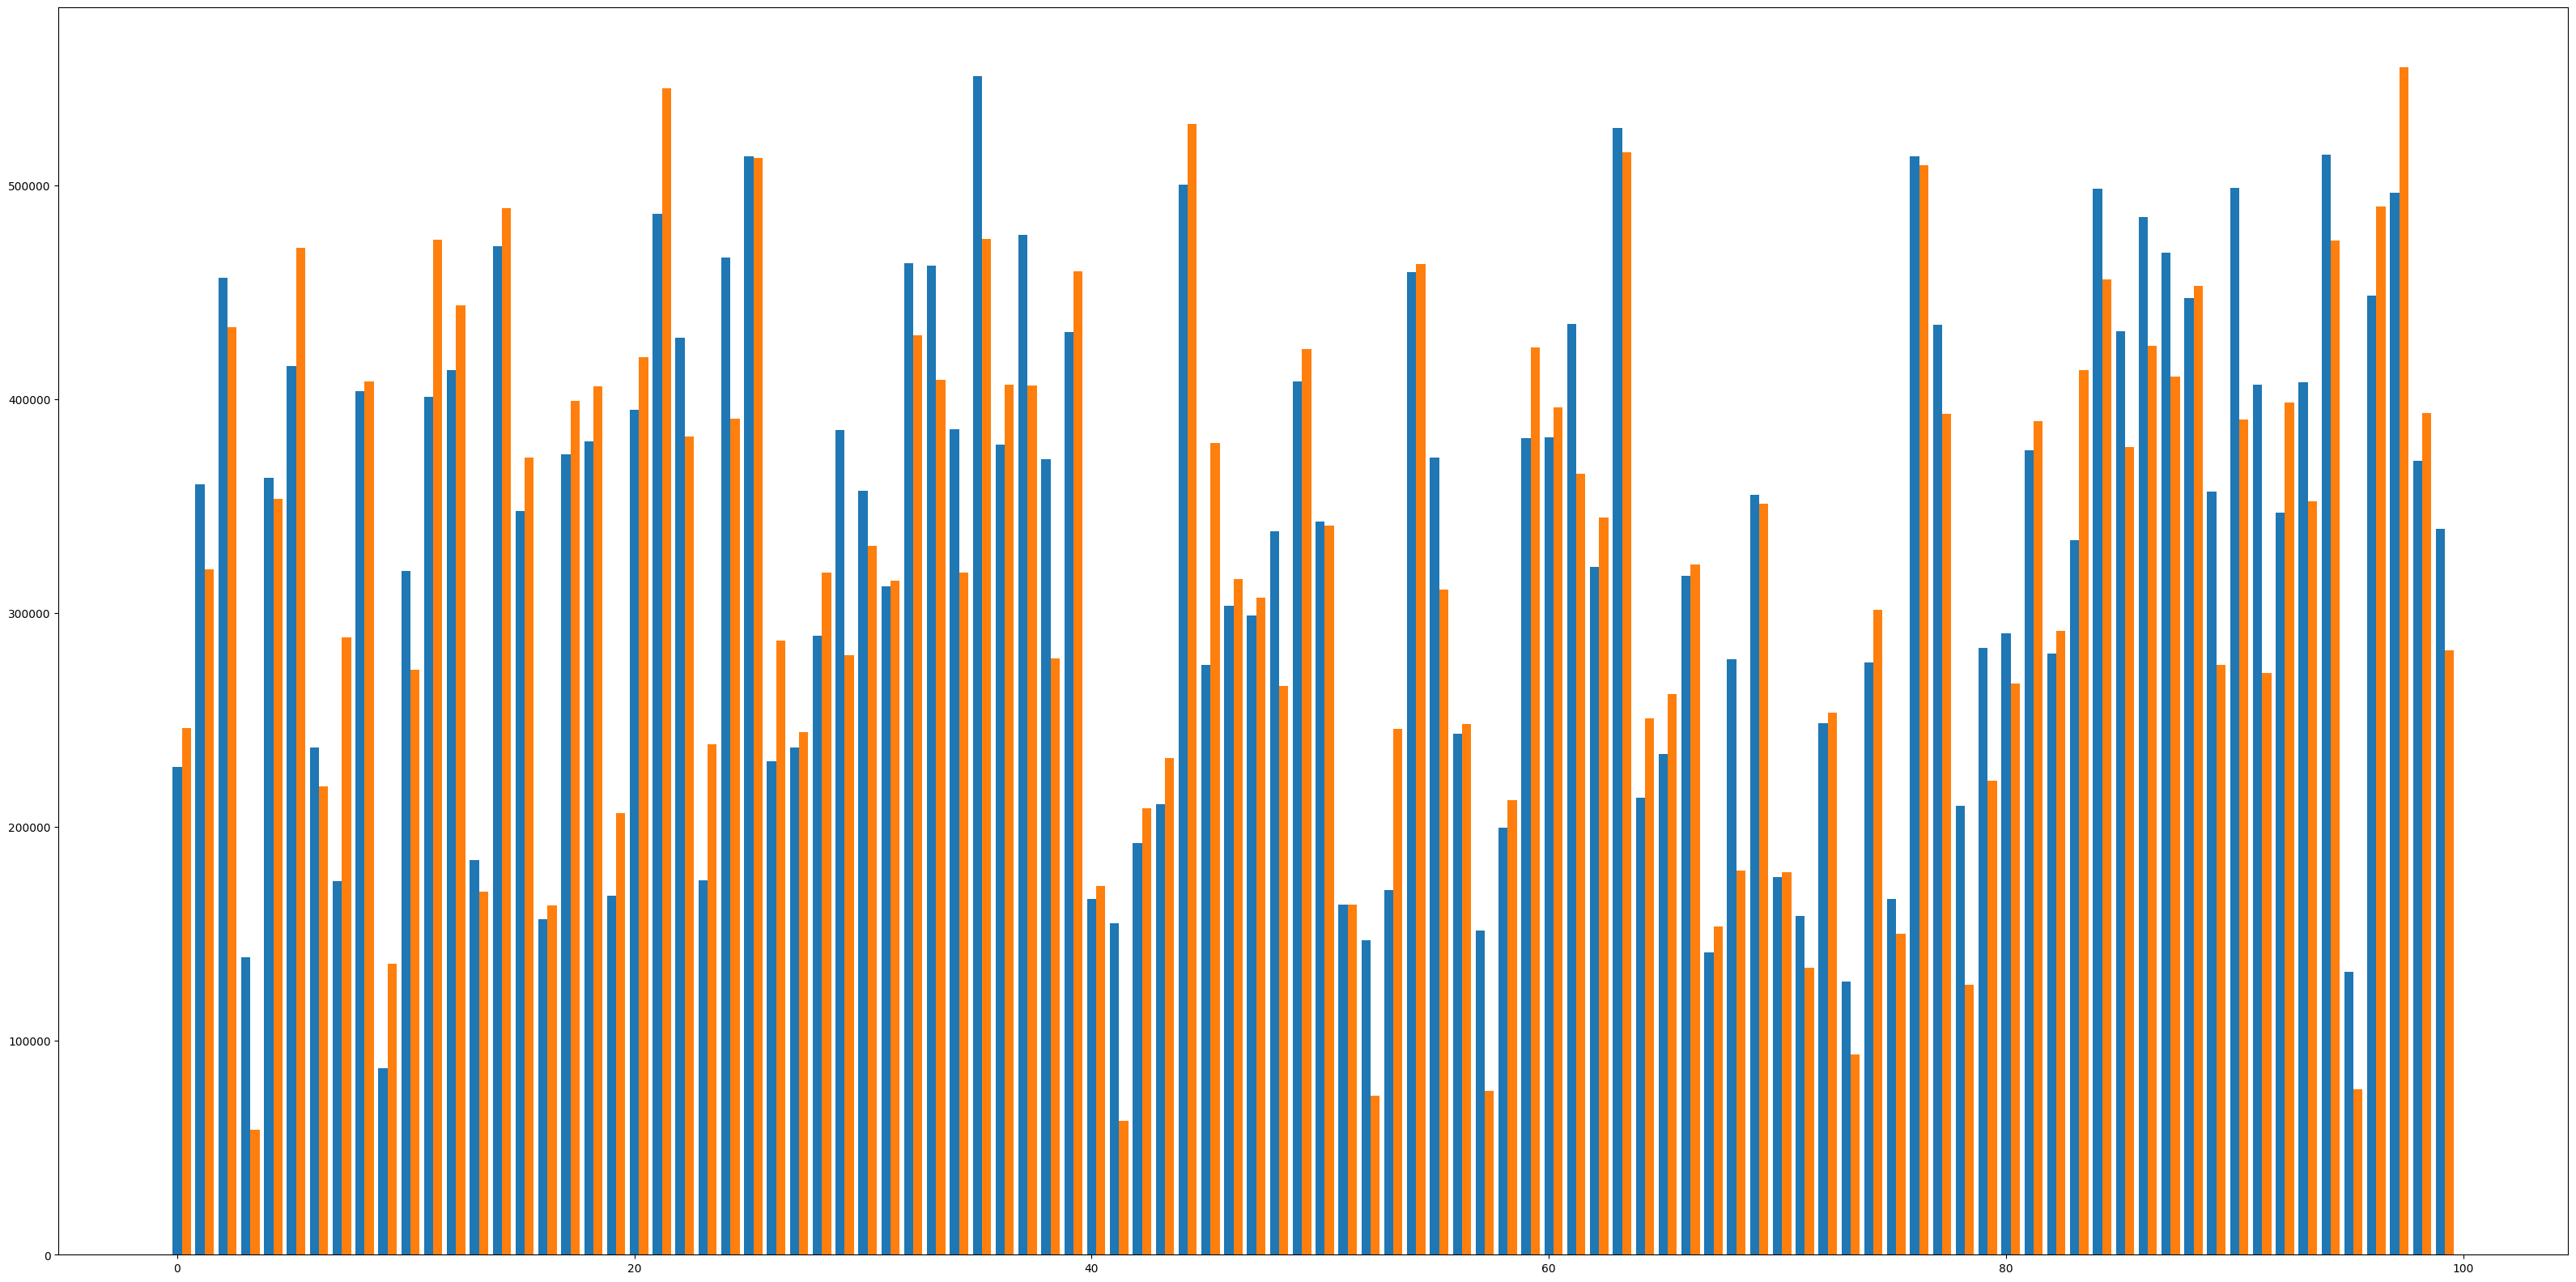

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.4

plt.bar(ind, Y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, Y_true, width, label='Actual Car Price')